In [1]:
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Embedding, Dense, SimpleRNN

Using TensorFlow backend.


In [2]:
max_length = 500
batch_size = 32
max_words_as_features = 10000
features_in_word_embeddings = 32

In [3]:
(train_X, train_Y), (test_X, test_Y) = imdb.load_data(num_words=max_words_as_features)
train_X = sequence.pad_sequences(train_X, maxlen=max_length)
test_X = sequence.pad_sequences(test_X, maxlen=max_length)
print('Shape of input data :', train_X.shape)
print('Shape of output data :', test_X.shape)

Shape of input data : (25000, 500)
Shape of output data : (25000, 500)


In [4]:
print( max_words_as_features, features_in_word_embeddings )

10000 32


In [5]:
model = Sequential()
model.add( Embedding( max_words_as_features, features_in_word_embeddings ))
model.add( SimpleRNN(32, return_sequences=True))
model.add( SimpleRNN(32, return_sequences=True))
model.add( SimpleRNN(32))
model.add( Dense(1, activation='sigmoid') )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_X, train_Y, epochs=10, batch_size=batch_size, validation_split=0.2)

/Users/gursharan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 179s 9ms/step - loss: 0.5987 - acc: 0.6533 - val_loss: 0.4611 - val_acc: 0.7912
Epoch 2/10
20000/20000 [==============================] - 177s 9ms/step - loss: 0.3867 - acc: 0.8347 - val_loss: 0.3792 - val_acc: 0.8354
Epoch 3/10
20000/20000 [==============================] - 167s 8ms/step - loss: 0.3127 - acc: 0.8726 - val_loss: 0.3821 - val_acc: 0.8340
Epoch 4/10
20000/20000 [==============================] - 174s 9ms/step - loss: 0.2534 - acc: 0.9024 - val_loss: 0.3755 - val_acc: 0.8556
Epoch 5/10
20000/20000 [==============================] - 161s 8ms/step - loss: 0.1909 - acc: 0.9287 - val_loss: 0.4187 - val_acc: 0.8518
Epoch 6/10
20000/20000 [==============================] - 161s 8ms/step - loss: 0.1278 - acc: 0.9546 - val_loss: 0.5598 - val_acc: 0.8150
Epoch 7/10
20000/20000 [==============================] - 160s 8ms/step - loss: 0.0831 - acc: 0.9722 - val_loss: 0.5430 - v

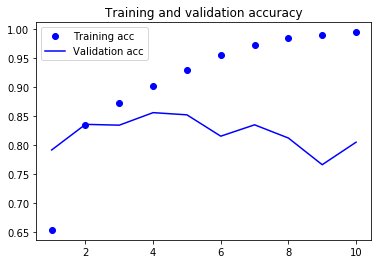

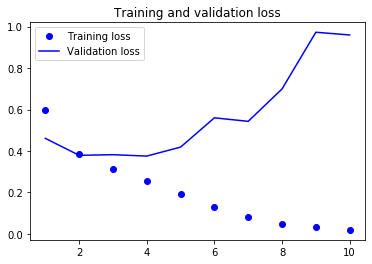

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### OVERFITTING after couple of epochs. Maximum validation accuracy we achieve is ~85%. Why simpleRNN doesn't perform as well? It is unable to learn long term dependencies for given timeline because of vanishing gradient problem. This is reason to design LSTM and GRU layers.
### Using more advanced layers!

In [10]:
from keras.layers import LSTM, GRU

In [12]:
model_2 = Sequential()
model_2.add( Embedding( max_words_as_features, features_in_word_embeddings ))
model_2.add( LSTM(32, return_sequences=True))
model_2.add( LSTM(32))
model_2.add( Dense(1, activation='sigmoid') )
model_2.summary()
model_2.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
history_2 = model_2.fit(train_X, train_Y, epochs=10, batch_size=batch_size, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________


/Users/gursharan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 201s 10ms/step - loss: 0.6128 - acc: 0.6458 - val_loss: 0.4604 - val_acc: 0.7880
Epoch 2/10
20000/20000 [==============================] - 202s 10ms/step - loss: 0.4026 - acc: 0.8256 - val_loss: 0.3483 - val_acc: 0.8566
Epoch 3/10
20000/20000 [==============================] - 219s 11ms/step - loss: 0.2942 - acc: 0.8819 - val_loss: 0.4395 - val_acc: 0.8366
Epoch 4/10
20000/20000 [==============================] - 223s 11ms/step - loss: 0.2406 - acc: 0.9064 - val_loss: 0.2779 - val_acc: 0.8900
Epoch 5/10
20000/20000 [==============================] - 227s 11ms/step - loss: 0.2109 - acc: 0.9197 - val_loss: 0.2820 - val_acc: 0.8856
Epoch 6/10
20000/20000 [==============================] - 204s 10ms/step - loss: 0.1889 - acc: 0.9313 - val_loss: 0.2957 - val_acc: 0.8904
Epoch 7/10
20000/20000 [==============================] - 209s 10ms/step - loss: 0.1705 - acc: 0.9385 - val_loss: 0.3

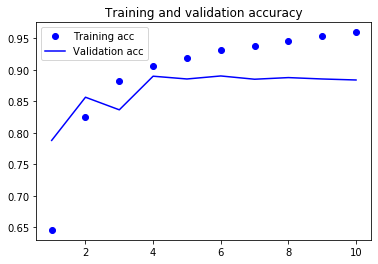

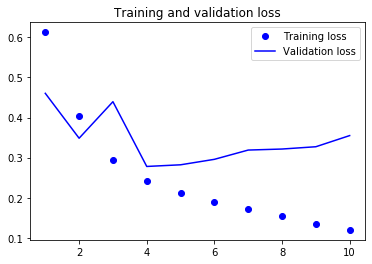

In [13]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### We see better validation accuracy with LSTMs